In [1]:
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LogisticRegression
    from scipy.stats import zscore
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import PowerTransformer
    from sklearn.model_selection import cross_val_score
    import joblib
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("lpt",sep=",")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Above details shows the  dataset being imported

In [3]:
pd.set_option("display.max_rows",None)

The above code is used to show the whole details

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

All columns in dataset

In [5]:
df=pd.DataFrame(data=df)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have both object and float type values in all columns

In [7]:
df.shape

(614, 13)

We have 614 rows and 13 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Shows number of rows,null values and datatypes

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see there are  null values in few columns

<AxesSubplot:>

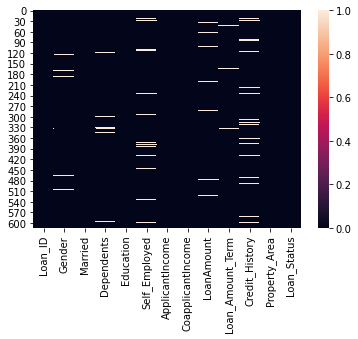

In [10]:
sns.heatmap(df.isnull())

The above heat map shows there are  null values

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The above data shows standard devation,Mean,Count,25%percentile,50%percentile,75%percentile,minimum value and maximum value

In [12]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

We can see there are two types of values in target variable

<AxesSubplot:xlabel='Dependents', ylabel='count'>

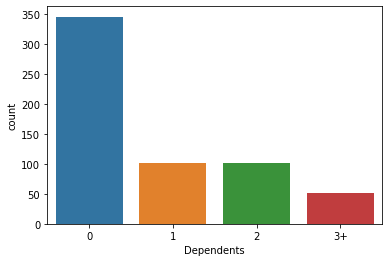

In [13]:
sns.countplot(df["Dependents"])

Countplot for Dependents column

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

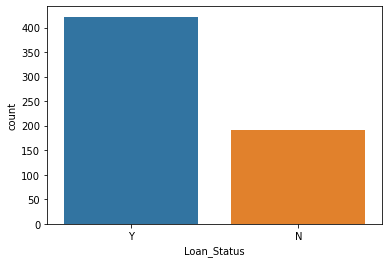

In [14]:
sns.countplot(df["Loan_Status"])

we have 2 classes and are not eqalily distributed,there is class imbalance issue 

<AxesSubplot:>

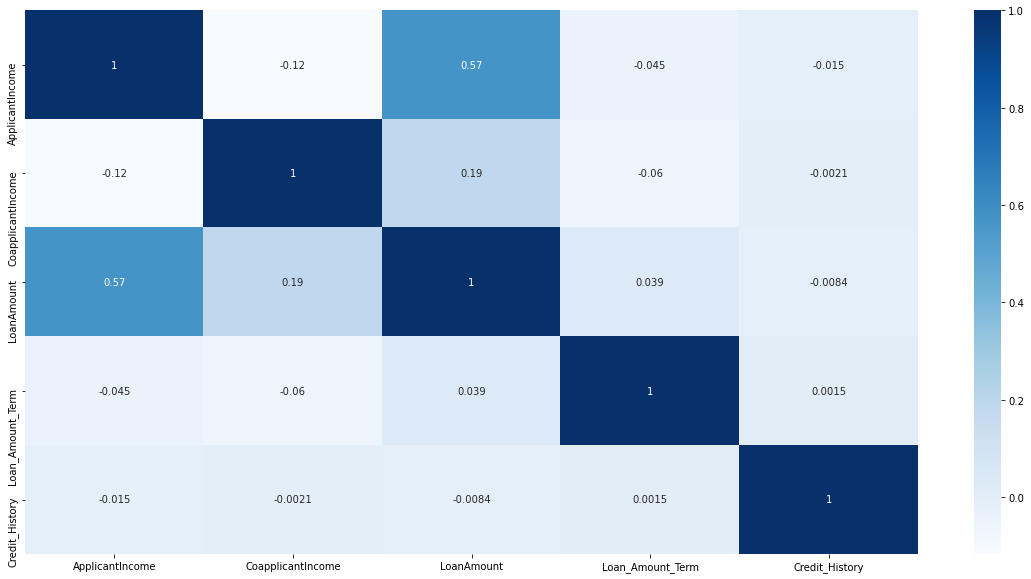

In [15]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

In [16]:
df=df.replace(np.NaN,0)

Replacing NaN values with zero

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can there are no null values in the dataset

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


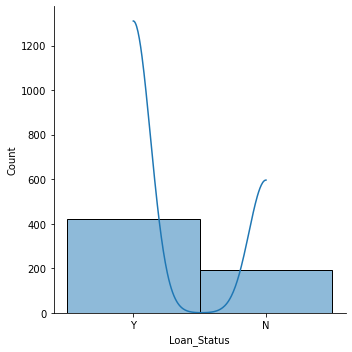

In [19]:
 sns.displot(df["Loan_Status"],bins=20,kde=True)

The above distribution plot for Loan_Status

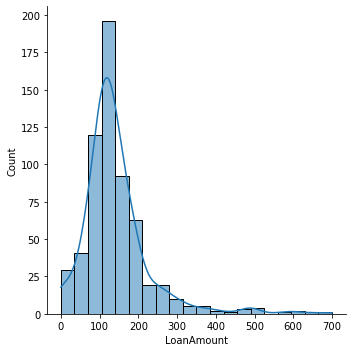

In [20]:
 sns.displot(df["LoanAmount"],bins=20,kde=True)

The above distribution plot for LoanAmount

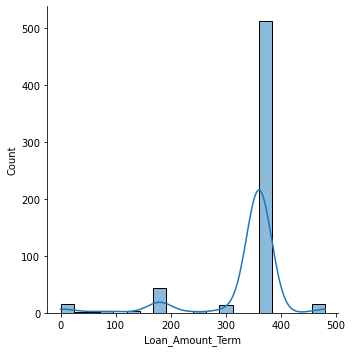

In [21]:
 sns.displot(df["Loan_Amount_Term"],bins=20,kde=True)

The above distribution plot for Loan_Amount_Term

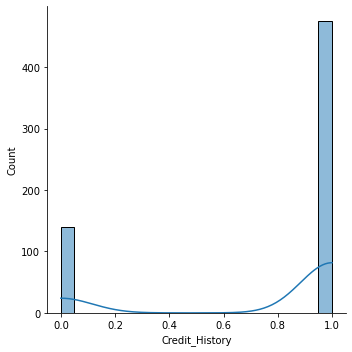

In [22]:
 sns.displot(df["Credit_History"],bins=20,kde=True)

The above distribution plot for Credit_History

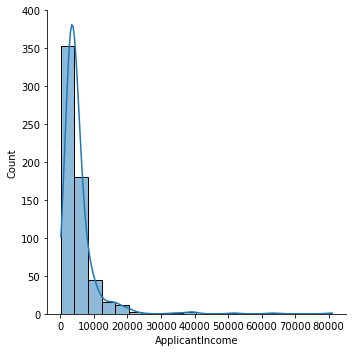

In [23]:
 sns.displot(df["ApplicantIncome"],bins=20,kde=True)

The above distribution plot for ApplicantIncome

<AxesSubplot:xlabel='count', ylabel='Gender'>

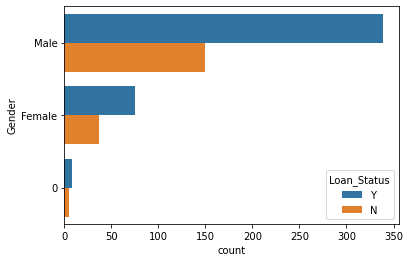

In [24]:
sns.countplot(y=df['Gender'], hue=df['Loan_Status'])

This shows the count plot for Gender and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='Dependents'>

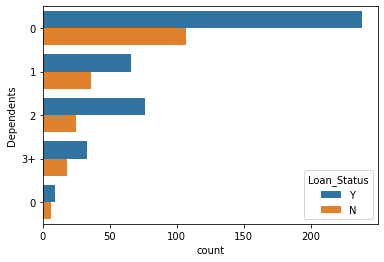

In [25]:
sns.countplot(y=df['Dependents'], hue=df['Loan_Status'])

This shows the count plot for Dependents and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='Education'>

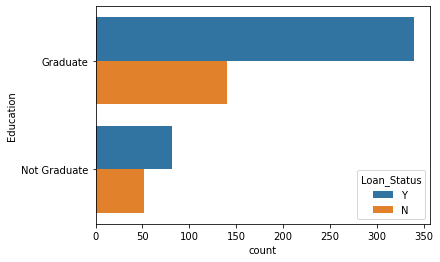

In [26]:
sns.countplot(y=df['Education'], hue=df['Loan_Status'])

This shows the count plot for Education and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

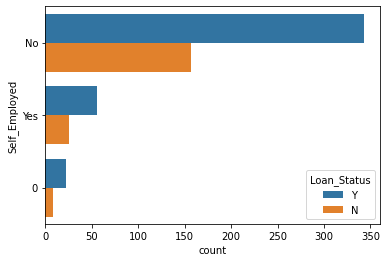

In [27]:
sns.countplot(y=df['Self_Employed'], hue=df['Loan_Status'])

This shows the count plot for Self_Employed and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='ApplicantIncome'>

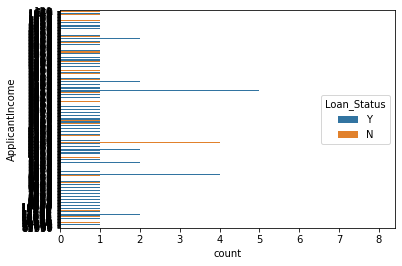

In [28]:
sns.countplot(y=df['ApplicantIncome'], hue=df['Loan_Status'])

This shows the count plot for ApplicantIncome and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='LoanAmount'>

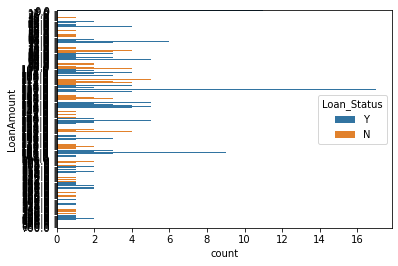

In [29]:
sns.countplot(y=df['LoanAmount'], hue=df['Loan_Status'])

This shows the count plot for LoanAmount and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

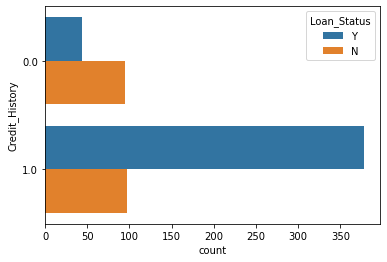

In [30]:
sns.countplot(y=df['Credit_History'], hue=df['Loan_Status'])

This shows the count plot for Credit_History and Loan_Status. 

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

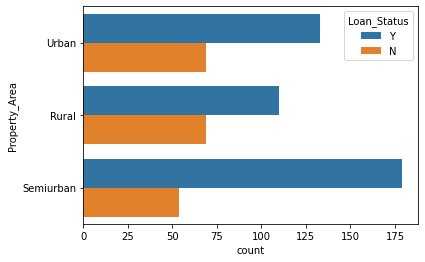

In [31]:
sns.countplot(y=df['Property_Area'], hue=df['Loan_Status'])

This shows the count plot for Property_Area and Loan_Status. 

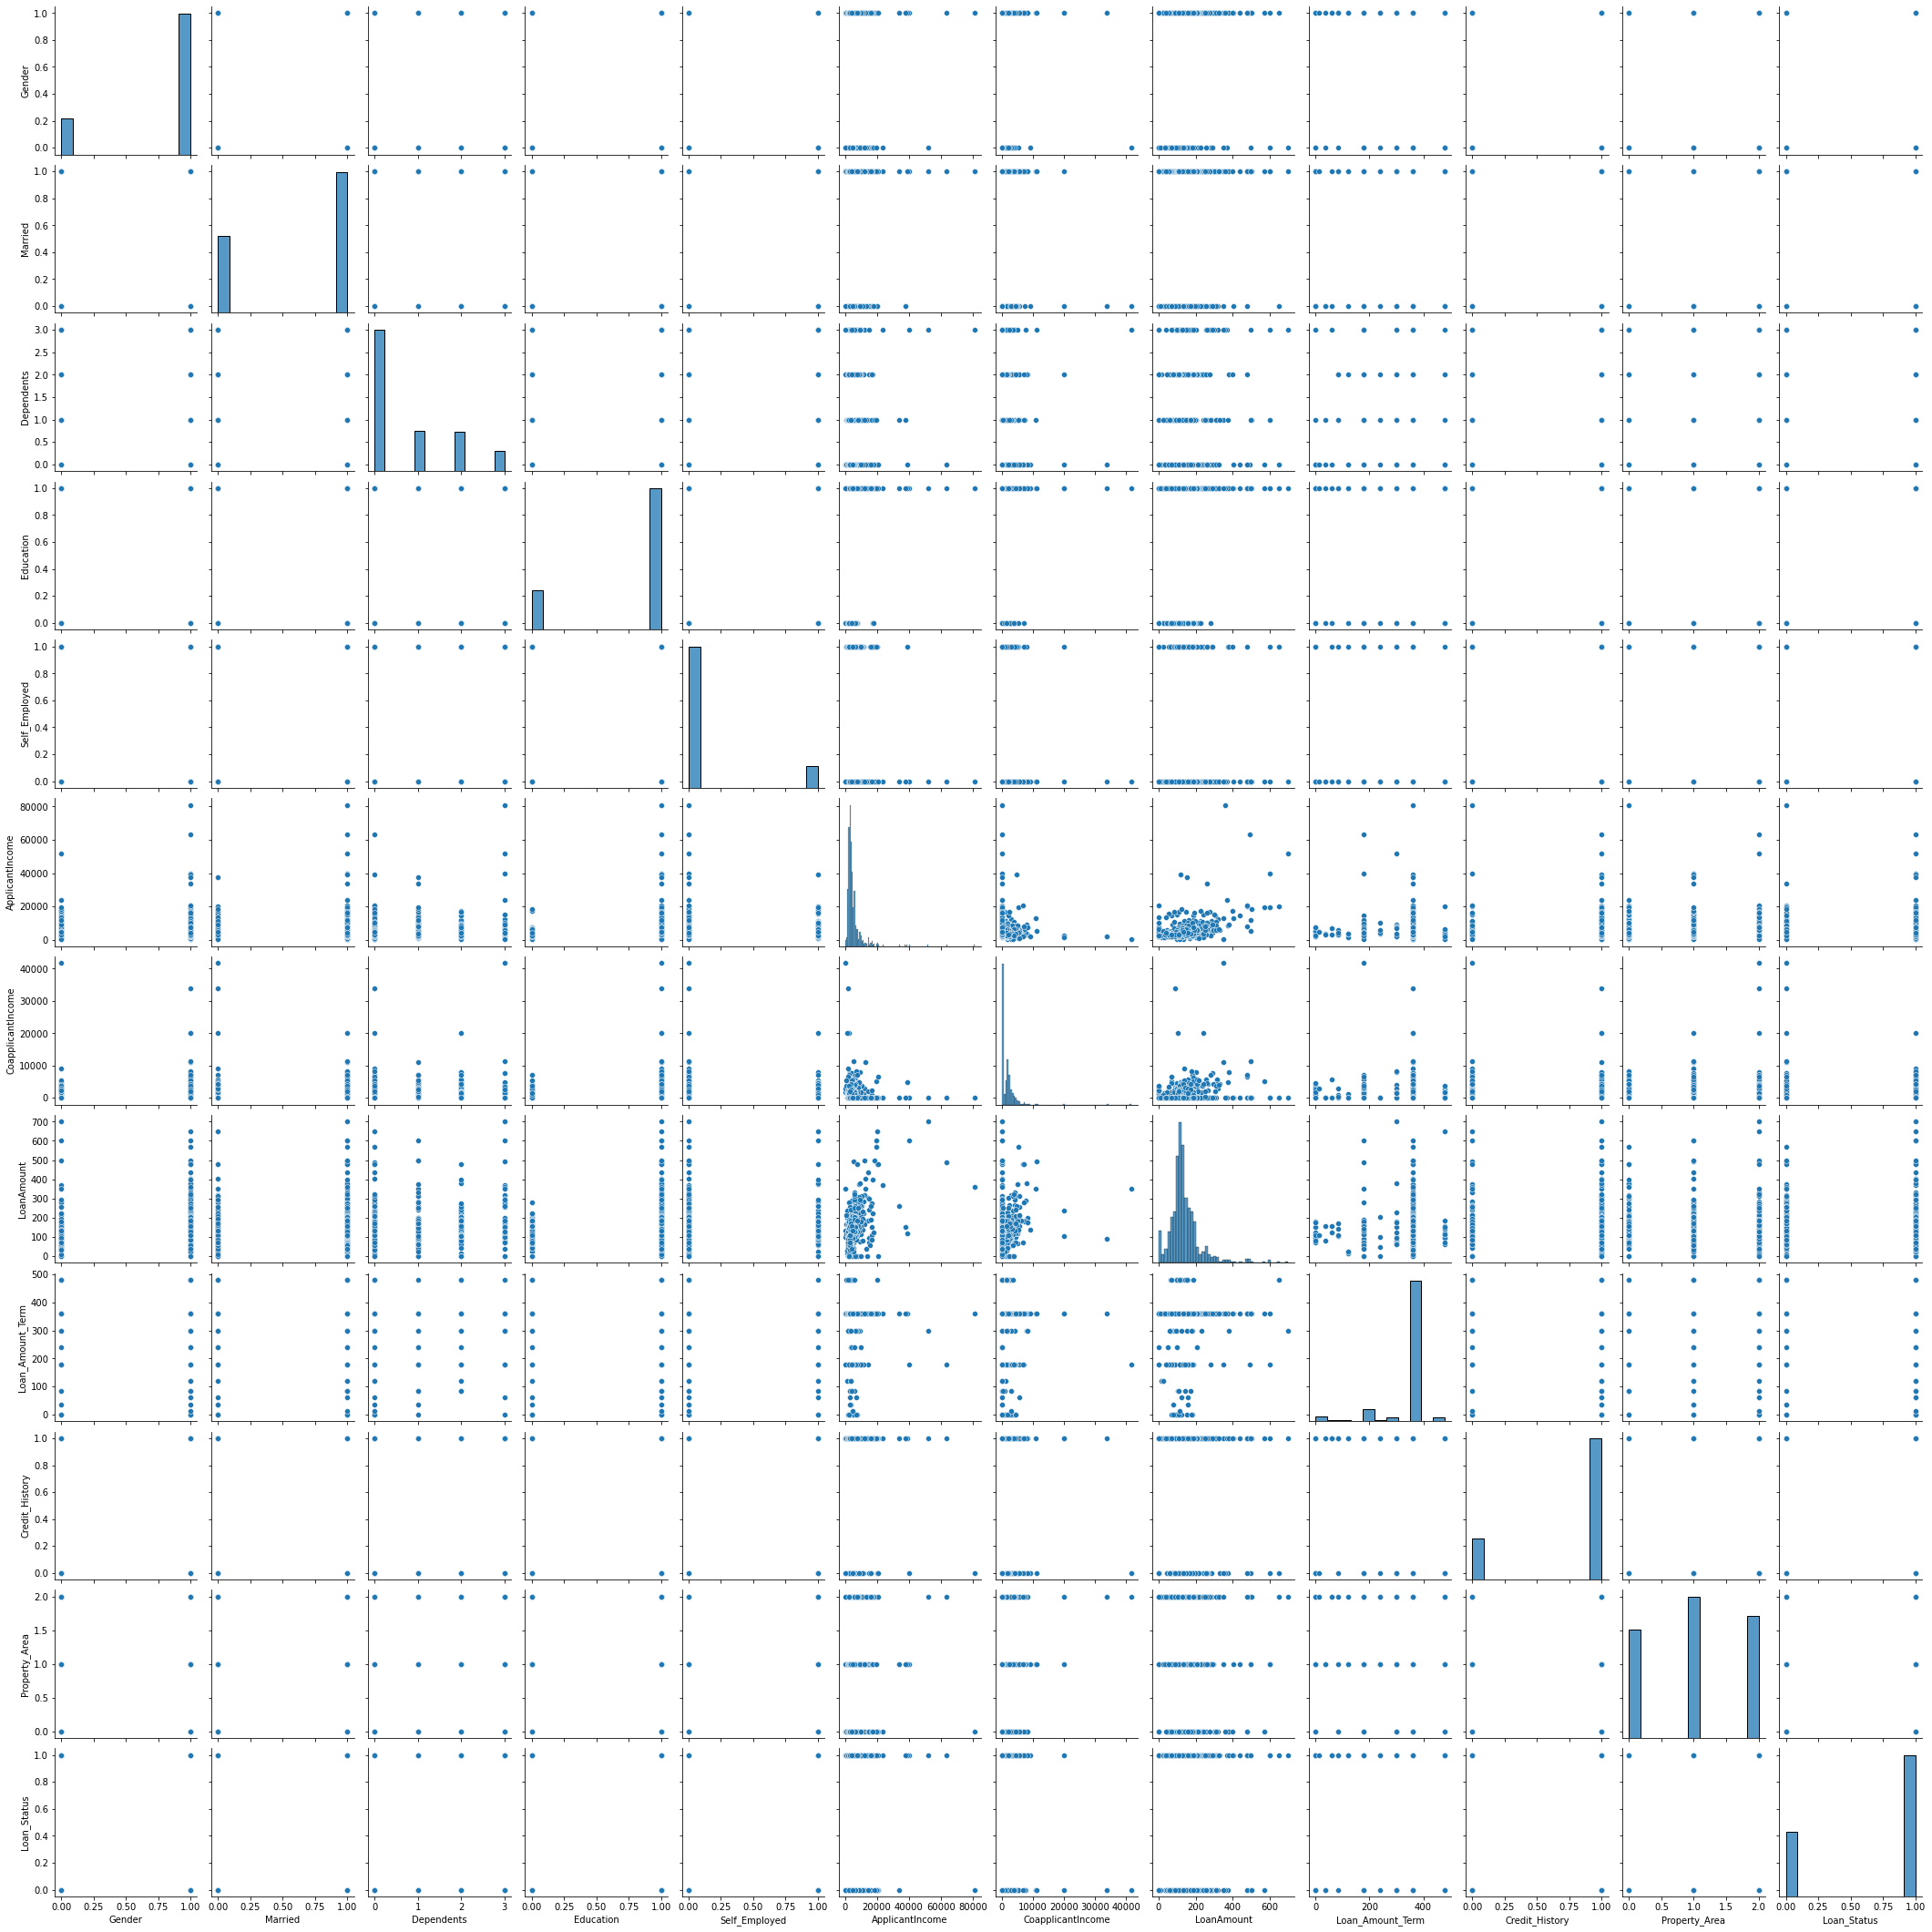

In [83]:
sns.pairplot(df)

The above details show the pair plot with respect to target variable

In [32]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Unique values in Property_Area column

In [33]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

Unique values in Education column

In [34]:
df["Gender"].unique()

array(['Male', 'Female', 0], dtype=object)

Unique values in Gender column

In [35]:
df["Married"].unique()

array(['No', 'Yes', 0], dtype=object)

Unique values in Married column

In [36]:
df["Self_Employed"].unique()

array(['No', 'Yes', 0], dtype=object)

Unique values in Self_Employed column

In [37]:
df["Loan_ID"].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [38]:
df.drop("Loan_ID",axis="columns",inplace=True)

We have dropping Loan id column as it doesn't impact the performance

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# The below codes are used to encode string values to zero and ones

In [40]:
col_name="Property_Area"
d = {'Urban':2,'Semiurban':1,'Rural':0}
df[col_name].replace(d,inplace=True)

In [41]:
col_name="Self_Employed"
d = {'Yes':1,'No':0}
df[col_name].replace(d,inplace=True)

In [42]:
col_name="Education"
d ={'Graduate':1, 'Not Graduate':0}
df[col_name].replace(d,inplace=True)

In [43]:
d = {'Yes':1,'No':0}
df['Married'].replace(d,inplace=True)

In [44]:
gender = {'Male':1,'Female':0}
df['Gender'].replace(gender,inplace=True)

In [45]:
d = {'3+':3}
df['Dependents'].replace(d,inplace=True)

In [46]:
loan_status = {'N':0,'Y':1}
df['Loan_Status'].replace(loan_status,inplace=True)

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,0.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


<AxesSubplot:>

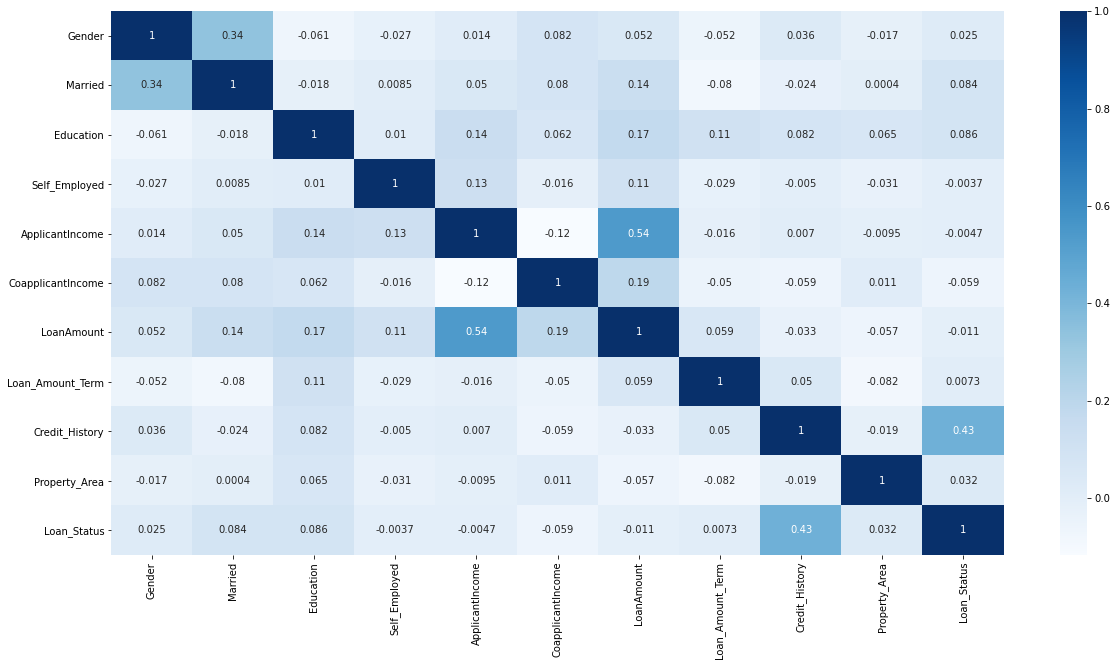

In [48]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [50]:
df['Dependents'] = pd.to_numeric(df['Dependents'],errors = 'coerce')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


Now we have converted all columns to integer and float datatype

<AxesSubplot:>

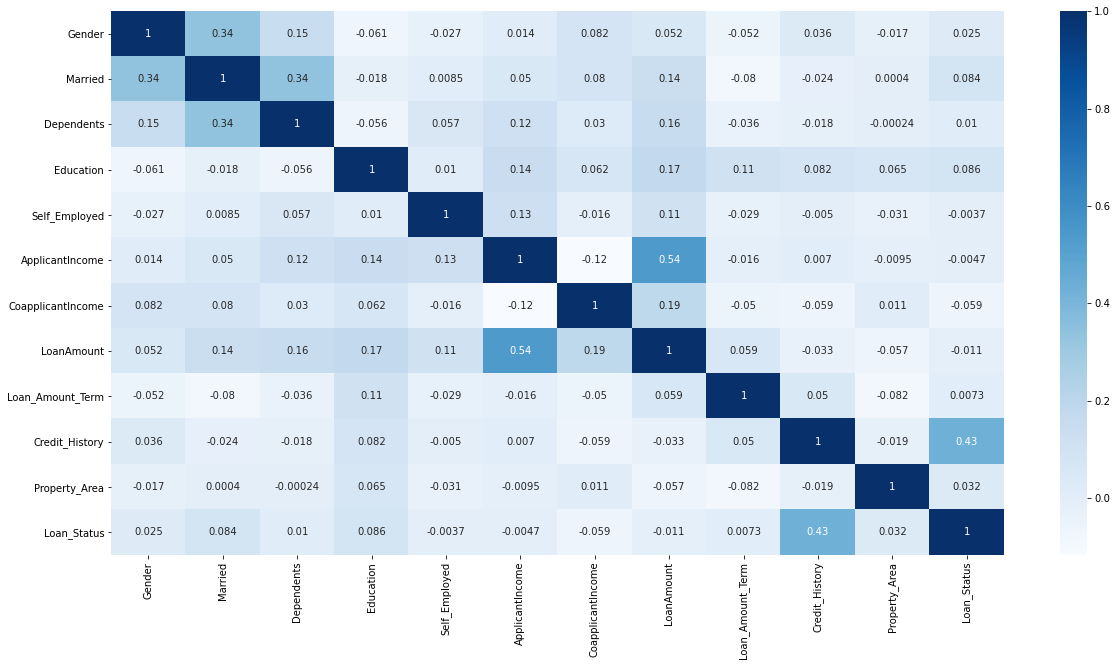

In [52]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

    This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

# Zscore for removing outliers

In [53]:
from scipy.stats import zscore

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  9,  19,  36,  44,  45,  68,  73, 112, 126, 130, 155, 155, 165,
       171, 171, 177, 177, 183, 185, 197, 223, 232, 242, 262, 278, 308,
       313, 333, 333, 335, 367, 369, 402, 409, 417, 421, 423, 443, 487,
       495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 604], dtype=int64), array([6, 8, 8, 8, 8, 8, 8, 8, 5, 7, 5, 7, 8, 5, 7, 6, 7, 5, 5, 8, 8, 8,
       8, 8, 7, 7, 8, 5, 7, 8, 8, 7, 6, 5, 6, 8, 8, 5, 7, 8, 8, 7, 7, 8,
       7, 8, 6, 8, 6, 7], dtype=int64))


In [54]:
print("shape before removing the outliers",df.shape)
df_new=df[(zscr<3).all(axis=1)]
print("shape after removing the outliers",df_new.shape)

shape before removing the outliers (614, 12)
shape after removing the outliers (568, 12)


In [55]:
Dataloss=((614-568)/614)*100
Dataloss

7.491856677524431

In [56]:
df_new.skew()

Gender              -1.484800
Married             -0.604751
Dependents           1.020509
Education           -1.342579
Self_Employed        2.225859
ApplicantIncome      2.137809
CoapplicantIncome    1.386235
LoanAmount           0.828082
Loan_Amount_Term    -2.111015
Credit_History      -1.354938
Property_Area       -0.046545
Loan_Status         -0.851492
dtype: float64

As we see skewness is not in the range -0.50 and +0.50

# Seperating columns into Independent variables and target variables

In [57]:
x=df_new.drop("Loan_Status",axis=1)
y=df_new[["Loan_Status"]]

# Power transformation Method

In [58]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(x)

df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [59]:
df_new2.skew()

Gender              -1.484800
Married             -0.604751
Dependents           0.456420
Education           -1.342579
Self_Employed        2.225859
ApplicantIncome      0.024611
CoapplicantIncome   -0.173722
LoanAmount           0.040142
Loan_Amount_Term     0.667116
Credit_History      -1.354938
Property_Area       -0.151423
dtype: float64

In [60]:
df_new2.shape

(568, 11)

# Standard Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new2)
x=pd.DataFrame(x,columns=df_new2.columns)

In [62]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.503848,-1.346061,-0.819244,0.533917,-0.384024,0.666004,-1.111327,-2.587665,0.142788,0.531194,1.204564
1,0.503848,0.742908,0.875808,0.533917,-0.384024,0.226341,0.758918,0.027650,0.142788,0.531194,-1.341549
2,0.503848,0.742908,-0.819244,0.533917,2.604001,-0.524877,-1.111327,-0.991290,0.142788,0.531194,1.204564
3,0.503848,0.742908,-0.819244,-1.872949,-0.384024,-0.786428,0.906955,-0.094582,0.142788,0.531194,1.204564
4,0.503848,-1.346061,-0.819244,0.533917,-0.384024,0.712257,-1.111327,0.221935,0.142788,0.531194,1.204564


# Train test split

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(443, 11)
(125, 11)
(443, 1)
(125, 1)


# Logistic Regression

In [64]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.712
[[19 23]
 [13 70]]
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        42
           1       0.75      0.84      0.80        83

    accuracy                           0.71       125
   macro avg       0.67      0.65      0.65       125
weighted avg       0.70      0.71      0.70       125



# GaussianNB

In [65]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

accuracy score :
0.712
[[22 20]
 [16 67]]
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        42
           1       0.77      0.81      0.79        83

    accuracy                           0.71       125
   macro avg       0.67      0.67      0.67       125
weighted avg       0.71      0.71      0.71       125



# Support Vector Classifier

In [66]:
sv=SVC()
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.712
[[20 22]
 [14 69]]
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        42
           1       0.76      0.83      0.79        83

    accuracy                           0.71       125
   macro avg       0.67      0.65      0.66       125
weighted avg       0.70      0.71      0.70       125



# Decision Tree Classifier

In [67]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy score :
0.616
[[23 19]
 [29 54]]
              precision    recall  f1-score   support

           0       0.44      0.55      0.49        42
           1       0.74      0.65      0.69        83

    accuracy                           0.62       125
   macro avg       0.59      0.60      0.59       125
weighted avg       0.64      0.62      0.62       125



# KNeighbors Classifier  

In [68]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy score :
0.672
[[17 25]
 [16 67]]
              precision    recall  f1-score   support

           0       0.52      0.40      0.45        42
           1       0.73      0.81      0.77        83

    accuracy                           0.67       125
   macro avg       0.62      0.61      0.61       125
weighted avg       0.66      0.67      0.66       125



# Support vector classifier with different kernel

In [69]:
sv=SVC(kernel="poly")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.688
[[18 24]
 [15 68]]
              precision    recall  f1-score   support

           0       0.55      0.43      0.48        42
           1       0.74      0.82      0.78        83

    accuracy                           0.69       125
   macro avg       0.64      0.62      0.63       125
weighted avg       0.67      0.69      0.68       125



In [70]:
sv=SVC(kernel="rbf")
sv.fit(x_train,y_train)
preds=sv.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

accuracy score :
0.712
[[20 22]
 [14 69]]
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        42
           1       0.76      0.83      0.79        83

    accuracy                           0.71       125
   macro avg       0.67      0.65      0.66       125
weighted avg       0.70      0.71      0.70       125



# Ensemble Methods using Random forest and Ada booster

In [71]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

accuracy score :
0.68
[[19 23]
 [17 66]]
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        42
           1       0.74      0.80      0.77        83

    accuracy                           0.68       125
   macro avg       0.63      0.62      0.63       125
weighted avg       0.67      0.68      0.67       125



In [72]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("accuracy score :",)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

accuracy score :
0.688
[[19 23]
 [16 67]]
              precision    recall  f1-score   support

           0       0.54      0.45      0.49        42
           1       0.74      0.81      0.77        83

    accuracy                           0.69       125
   macro avg       0.64      0.63      0.63       125
weighted avg       0.68      0.69      0.68       125



# Cross validation method

In [73]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.79824561 0.74561404 0.73684211 0.79646018 0.80530973]
0.7764943331780779


In [74]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[0.79824561 0.73684211 0.73684211 0.79646018 0.78761062]
0.7712001242043162


In [75]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.65789474 0.63157895 0.64035088 0.69911504 0.65486726]
0.6567613724576928


In [76]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.77192982 0.66666667 0.71052632 0.7699115  0.73451327]
0.7307095171557212


In [77]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.73684211 0.71052632 0.75438596 0.7699115  0.77876106]
0.7500853904673187


In [78]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.72807018 0.6754386  0.71052632 0.7699115  0.77876106]
0.7325415308181958


# Saving the best model accuracy

In [79]:
import pickle
filename="lasp.pkl"
pickle.dump(lg,open(filename,"wb"))

# Conclusion

In [80]:
loaded_model=pickle.load(open("lasp.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.712


In [81]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
y_over.value_counts()

Loan_Status
1              395
0              395
dtype: int64

We can see now the target variable is equally distributed

In [82]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
Predicted,1,1,1,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Original,1,1,1,0,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
